In [89]:
import sys

COMMAND = "drawgraph"
batchsize = "550"
startSize = "550"
fileName = "run.out."+startSize+"."+batchsize+".tR"
inFile = open(fileName,"r")
data = {}
counts = {}
experiments = {}
for line in inFile:
    line = line.rstrip()
    fields = line.split("\t")
    if len(fields) != 2: sys.exit(COMMAND+": unexpected input line (TAB): "+line)
    key,value = fields
    if not key in data:
        data[key] = float(value)
        counts[key] = 1
    else:
        data[key] += float(value)
        counts[key] += 1
    fields = key.split(" ")
    if len(fields) != 4: sys.exit(COMMAND+": unexpected input line (SPACE): "+line)
    experiments[fields[0]+" "+fields[1]]= True
inFile.close()

<IPython.core.display.Javascript object>


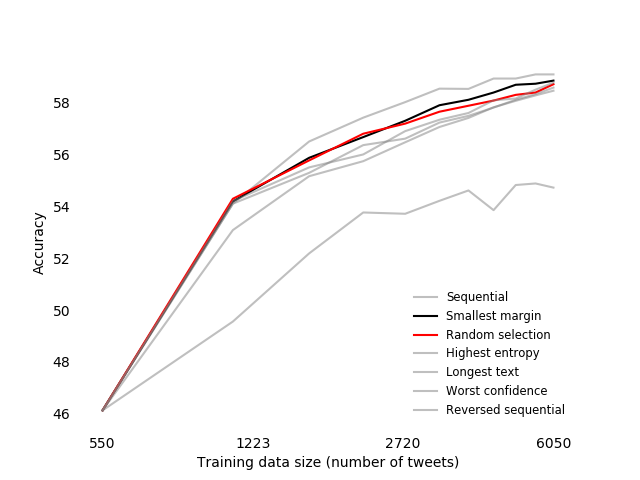

In [90]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import math
labels = { "e":"Highest entropy","c":"Worst confidence","l":"Longest text","m":"Smallest margin",\
           "r":"Random selection","t":"Sequential","t-R":"Reversed sequential"}
plt.figure()
for e in ["t","m","r","e","l","c","t-R"]:
    x = []
    y = []
    experiment = e+" "+batchsize
    for key in data:
        fields = key.split(" ")
        if fields[0]+" "+fields[1] == experiment:
            x.append(fields[2])
            y.append(data[key]/counts[key])
    if e == "r":
        plt.plot(x,y,'-',label=labels[e],color="red")
    elif e == "m":
        plt.plot(x,y,'-',label=labels[e],color="black")
    else:
        plt.plot(x,y,'-',label=labels[e],color="gray",alpha=0.5)

plt.legend(frameon=False,fontsize="small")
fig = plt.gca()
fig.set_xscale("log")
fig.set_xlabel("Training data size (number of tweets)")
fig.set_ylabel("Accuracy")
fig.set_title("")
fig.tick_params(top='off', bottom='off', left='off', right='off')
for spine in fig.spines.values(): spine.set_visible(False)
xticks = []
nbrOfTicks = 4
for i in range(0,nbrOfTicks):
    xticks.append(math.exp(math.log(float(startSize))+i*(math.log(float(startSize)+10*float(batchsize))\
                                                        -math.log(float(startSize)))/(nbrOfTicks-1)))
fig.set_xticks(xticks)
fig.xaxis.set_major_formatter(ScalarFormatter())
fig.minorticks_off()
plt.show()

plt.savefig(fileName+".pdf")